In [150]:
# coding=utf-8
# This is a sample Python script.
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as spi
import time
import pandas as pd
from sklearn.linear_model import LinearRegression

In [151]:
np.set_printoptions(suppress=True)

##  Capability of healthcare system

In [152]:
# Define the xy

# year
x = np.array([2018, 2019, 2020, 2021]).reshape((-1, 1)).astype(int)

# the number of beds N
y_N = np.array([8404078, 8806956, 9100700, 9448448])
# bed utilization rate R
y_R = np.array([84.2, 83.6, 72.3, 74.6])
# the average number of days a patient stays D 
y_D = np.array([9.3, 9.1, 9.5, 9.2])

In [153]:
def predict_Y(x,y,x_pre):
    model = LinearRegression()
    model.fit(x, y)
    print(model.score(x, y))
    x_pre = np.array([x_pre]).reshape((-1, 1))
    return model.predict(x_pre)[0]

In [154]:
# predict the number of beds N in 2022
N_2022 = predict_Y(x,y_N,2022)
N_2022

0.9964522614628124


9796759.0

In [155]:
# predict bed utilization rate R in 2022
R_2022 = predict_Y(x,y_R,2022)
R_2022

0.7176853897480848


68.65000000000055

In [156]:
# predict the average number of days a patient stays D in 2022
D_2022 = predict_Y(x,y_D,2022)
D_2022

0.005714285714274903


9.299999999999997

In [157]:
# (1-R)*T/D*N
days = 150
(1-R_2022*0.01)*days/D_2022*N_2022

49536837.84677334

## COVID-19 infection model based on SEIR model

In [158]:
# N为人群总数
N = 1410000000
# β为传染率
beta = 0.56
# C为日社交人数
c = 1
# gamma为恢复率系数
gamma = 1/28
# Te为疾病潜伏期
Te = 7
# I_0为感染者的初始人数
I_0 = 547
# E_0为潜伏者的初始人数
E_0 = 0
# R_0为治愈者的初始人数
R_0 = 0
# S_0为易感者的初始人数
S_0 = N - I_0 - E_0 - R_0
# T为传播时间
T = 150
# INI为初始状态下的数组
INI = (S_0,E_0,I_0,R_0)

In [159]:
def funcSEIR_C(inivalue,_):
 Y = np.zeros(4)
 X = inivalue
 # 易感个体变化
 Y[0] = - (c * beta * X[0] *(X[2]+X[1])) / N
 # 潜伏个体变化
 Y[1] = (c * beta * X[0] *( X[2]+X[1])) / N - X[1] / Te
 # 感染个体变化
 Y[2] = X[1] / Te - gamma * X[2]
 # 治愈个体变化
 Y[3] = gamma * X[2]
 return Y

In [160]:
# do the simulation
T_range = np.arange(0,T + 1)

# RES = spi.odeint(funcSEIR,INI,T_range)
RES_C = spi.odeint(funcSEIR_C,INI,T_range)

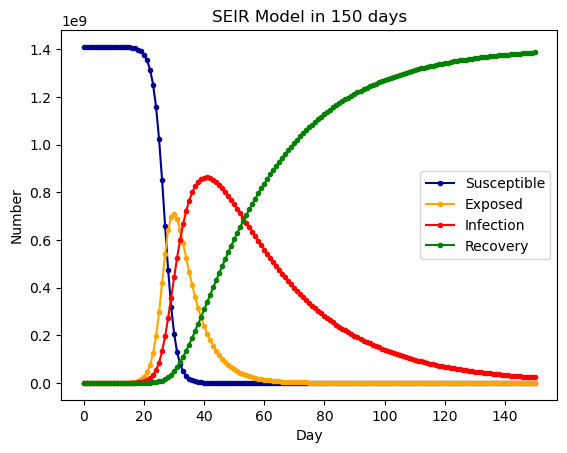

In [161]:
# plot the result
plt.plot(RES_C[:,0],color = 'darkblue',label = 'Susceptible',marker = '.')
plt.plot(RES_C[:,1],color = 'orange',label = 'Exposed',marker = '.')
plt.plot(RES_C[:,2],color = 'red',label = 'Infection',marker = '.')
plt.plot(RES_C[:,3],color = 'green',label = 'Recovery',marker = '.')

plt.title('SEIR Model in 150 days')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Number')
plt.show()

In [162]:
RES_C.max(axis=0)[2]

862158600.0811887

In [163]:
np.argwhere(RES_C == RES_C.max(axis=0)[2])

array([[41,  2]], dtype=int64)

In [171]:
862158600*0.115

99148239.0

In [172]:
99148239/49536838

2.0015052030571674

## China covid cases number

data source:https://ourworldindata.org/coronavirus/country/china

In [165]:
csv = pd.read_csv("./data_csv/owid-covid-data.csv")
# csv.info()
csv.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [166]:
csv_china = csv.query("location == 'China'")

csv_china.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
44127,CHN,Asia,China,2020-01-22,547.0,NaN,NaN,17.0,NaN,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44128,CHN,Asia,China,2020-01-23,639.0,92.0,NaN,18.0,1.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44129,CHN,Asia,China,2020-01-24,916.0,277.0,NaN,26.0,8.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44130,CHN,Asia,China,2020-01-25,1399.0,483.0,NaN,42.0,16.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN
44131,CHN,Asia,China,2020-01-26,2062.0,663.0,NaN,56.0,14.0,NaN,...,48.4,NaN,4.34,76.91,0.761,1.425887e+09,NaN,NaN,NaN,NaN


In [167]:
result_csv = csv_china[["iso_code", "location", "date", "total_cases", "total_deaths"]].reset_index().drop(["index"],axis=1)
# result_csv.head(10)
result_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1067 non-null   object 
 1   location      1067 non-null   object 
 2   date          1067 non-null   object 
 3   total_cases   1067 non-null   float64
 4   total_deaths  1067 non-null   float64
dtypes: float64(2), object(3)
memory usage: 41.8+ KB


In [168]:
# 2020-01-27
result_csv["year"] = result_csv["date"].map(lambda x: str(x)[0:4]).astype("int")
result_csv["month"] = result_csv["date"].map(lambda x: str(x)[5:7]).astype("int")
result_csv["day"] = result_csv["date"].map(lambda x: str(x)[8:]).astype("int")

result_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iso_code      1067 non-null   object 
 1   location      1067 non-null   object 
 2   date          1067 non-null   object 
 3   total_cases   1067 non-null   float64
 4   total_deaths  1067 non-null   float64
 5   year          1067 non-null   int32  
 6   month         1067 non-null   int32  
 7   day           1067 non-null   int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 54.3+ KB


In [169]:
# filter the date
result_csv = result_csv.query("year != 2022 | month != 11").query("year != 2022 | month != 12")
result_csv.head()

,iso_code,location,date,total_cases,total_deaths,year,month,day
0,CHN,China,2020-01-22,547.0,17.0,2020,1,22
1,CHN,China,2020-01-23,639.0,18.0,2020,1,23
2,CHN,China,2020-01-24,916.0,26.0,2020,1,24
3,CHN,China,2020-01-25,1399.0,42.0,2020,1,25
4,CHN,China,2020-01-26,2062.0,56.0,2020,1,26
